In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv("Data.csv")
data.head()

,sess_dt,hit_tm,biz_unit,tot_sess_hr_v,trfc_src,dvc_ctg_nm,action0,action1,action2,action3,action4,action5,clnt_gender,clnt_age
0,2,20,3,3256.0,0,0,11,8,16,7,2,23,1,1
1,6,23,3,872.0,0,0,7,6,6,2,0,21,1,1
2,5,7,3,1627.0,0,0,6,6,8,2,0,7,1,1
3,3,21,3,353.0,0,0,1,3,3,1,0,11,1,1
4,4,21,3,2253.0,0,0,2,1,6,4,0,5,1,1


In [7]:
import pandas_profiling
data.drop(["clnt_gender","clnt_age"],axis=1).profile_report()

In [203]:
OAI = pd.read_csv("Online.csv")
CTI = pd.read_csv("Customer.csv")
CTI = CTI[CTI["clnt_age"]!="unknown"]
OAI = OAI.drop(["trans_id","sech_kwd"],axis=1)
merge1 = OAI.merge(CTI,how = "inner", on="clnt_id")
merge1["dvc_ctg_nm"].fillna("unknown",inplace=True)
merge1.isnull().sum()

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


clnt_id               0
sess_id               0
hit_seq               0
action_type           0
biz_unit              0
sess_dt               0
hit_tm                0
hit_pss_tm            0
tot_pag_view_ct     429
tot_sess_hr_v      7667
trfc_src              0
dvc_ctg_nm            0
clnt_gender           0
clnt_age              0
dtype: int64

In [160]:
CTI.shape

(12245, 3)

In [94]:
oai0 = OAI[OAI["action_type"]==0][["clnt_id","sess_id"]]
oai0["sech_count"] = 1
oai0_group = oai0.groupby(["clnt_id","sess_id"]).sum().reset_index()
oai0_group.head()

,clnt_id,sess_id,sech_count
0,1,1,3
1,1,2,7
2,2,1,7
3,2,7,1
4,2,8,11


In [204]:
 merge1[merge1["tot_sess_hr_v"].isnull()].sort_values(by="tot_pag_view_ct",ascending=False)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
1678289,43345,3,1,2,A02,20190813,18:56,1771,2.0,NaN,unknown,PC,F,30
1602049,5803,2,3,5,A02,20190915,20:38,11699,2.0,NaN,unknown,PC,F,30
1592379,22482,2,3,5,A02,20190714,08:59,12959,2.0,NaN,unknown,PC,F,30
1787708,26964,8,1,2,A02,20190730,17:18,7232,2.0,NaN,unknown,mobile_app,F,30
1709857,38799,6,1,2,A02,20190717,12:23,8754,2.0,NaN,unknown,mobile_app,F,50-60
1724540,62904,7,1,2,A02,20190709,20:23,2640,2.0,NaN,unknown,mobile_app,F,30
1684173,32756,8,1,2,A02,20190909,15:05,3538,2.0,NaN,unknown,mobile_app,F,40
1579361,2962,9,1,0,A02,20190808,22:23,428,2.0,NaN,unknown,mobile_app,F,30
1646107,35944,8,1,2,A02,20190814,19:10,170,2.0,NaN,unknown,PC,M,50-60
1646120,35944,13,1,2,A02,20190916,21:18,1681,2.0,NaN,unknown,PC,M,50-60


In [205]:
merge1[(merge1["clnt_id"]==43345)&(merge1["sess_id"]==3)]

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age
1678289,43345,3,1,2,A02,20190813,18:56,1771,2.0,NaN,unknown,PC,F,30


In [76]:
merge1["sess_dt"]=="2019-07-15"

TypeError: must be str, not int

In [83]:
merge1 = merge1[merge1["tot_sess_hr_v"].notnull()]
merge1 = merge1[merge1["tot_pag_view_ct"].notnull()]
merge1["hit_pss_tm"][merge1["hit_pss_tm"]==0] = 0.5
merge1[['sess_id','hit_seq','action_type']] = merge1[['sess_id','hit_seq','action_type']].astype(np.int16)
merge1['clnt_id'] = merge1['clnt_id'].astype(np.int32)
merge1['hit_tm'] = (pd.to_datetime(merge1['hit_tm'])).dt.strftime("%H")
merge1['sess_dt'] = pd.to_datetime(merge1['sess_dt'], format='%Y%m%d')
merge1.shape

(1865195, 14)

In [121]:
merge2 = merge1.groupby(["clnt_id","sess_id","biz_unit","sess_dt","hit_tm","tot_sess_hr_v","tot_pag_view_ct","trfc_src","dvc_ctg_nm","clnt_gender","clnt_age"]).max()["action_type"].reset_index()
pss_tm = merge1.groupby(["clnt_id","sess_id","biz_unit","sess_dt","hit_tm","tot_sess_hr_v","tot_pag_view_ct","trfc_src","dvc_ctg_nm","clnt_gender","clnt_age"]).mean()["hit_pss_tm"].reset_index(drop= True)
merge2 = pd.concat([merge2,pss_tm],axis=1).sort_values(by=["clnt_id","sess_id","sess_dt"])
print(merge2.shape)
erd = merge2[(merge2["hit_tm"]=="23")|(merge2["hit_tm"]=="00")].reset_index(drop=True)
erd

(173051, 13)


,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,action_type,hit_pss_tm
0,2,1,A03,2019-07-28,23,872.0,55.0,DIRECT,unknown,F,30,6,3.849015e+05
1,2,1,A03,2019-07-29,00,39.0,6.0,DIRECT,unknown,F,30,5,6.880000e+03
2,2,6,A03,2019-07-30,23,24.0,4.0,DIRECT,unknown,F,30,5,1.931550e+04
3,2,18,A03,2019-08-28,23,76.0,7.0,DIRECT,unknown,F,30,0,7.610600e+04
4,23,3,A01,2019-07-11,00,888.0,34.0,unknown,mobile_app,F,40,0,8.586730e+05
5,23,4,A01,2019-07-13,23,1184.0,155.0,unknown,mobile_app,F,40,0,3.950023e+05
6,23,4,A01,2019-07-14,00,181.0,22.0,unknown,mobile_app,F,40,0,6.032180e+04
7,23,6,A01,2019-07-20,00,784.0,107.0,unknown,mobile_app,F,40,6,3.931582e+05
8,23,14,A01,2019-08-20,23,123.0,20.0,unknown,mobile_app,F,40,0,2.117500e+04
9,23,17,A01,2019-09-04,00,2176.0,133.0,unknown,mobile_app,F,40,0,8.475010e+05


In [122]:
list1 = []
for i in range(len(erd)-1):
    if erd["hit_tm"][i]=="23":
        if (((erd["sess_dt"][i+1]-erd["sess_dt"][i])).days==1)&(erd["hit_tm"][i+1]=="00"):
            erd["tot_sess_hr_v"][i]+=erd["tot_sess_hr_v"][i+1]
            erd["tot_pag_view_ct"][i]+=erd["tot_pag_view_ct"][i+1]
            erd["hit_pss_tm"][i]+=erd["hit_pss_tm"][i+1]
            erd["action_type"][i] = max(erd["action_type"][i],erd["action_type"][i+1] )
            list1.append(i+1)
erd.drop(list1,0,inplace=True)
erd
#.groupby(["clnt_id","sess_id","biz_unit"]).sum()[["tot_sess_hr_v","tot_pag_view_ct","hit_pss_tm"]]

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel

,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,action_type,hit_pss_tm
0,2,1,A03,2019-07-28,23,911.0,61.0,DIRECT,unknown,F,30,6,3.917815e+05
2,2,6,A03,2019-07-30,23,24.0,4.0,DIRECT,unknown,F,30,5,1.931550e+04
3,2,18,A03,2019-08-28,23,76.0,7.0,DIRECT,unknown,F,30,0,7.610600e+04
4,23,3,A01,2019-07-11,00,888.0,34.0,unknown,mobile_app,F,40,0,8.586730e+05
5,23,4,A01,2019-07-13,23,1365.0,177.0,unknown,mobile_app,F,40,0,4.553241e+05
7,23,6,A01,2019-07-20,00,784.0,107.0,unknown,mobile_app,F,40,6,3.931582e+05
8,23,14,A01,2019-08-20,23,123.0,20.0,unknown,mobile_app,F,40,0,2.117500e+04
9,23,17,A01,2019-09-04,00,2176.0,133.0,unknown,mobile_app,F,40,0,8.475010e+05
10,23,21,A01,2019-09-25,00,1709.0,62.0,unknown,mobile_app,F,40,6,1.400623e+06
11,29,6,A01,2019-09-22,00,1046.0,93.0,unknown,mobile_app,F,40,0,4.343242e+05


In [189]:
erd1= merge2[(merge2["hit_tm"]!="23")&(merge2["hit_tm"]!="00")]
data = pd.concat([erd1,erd],axis=0).reset_index(drop=True)
len(np.unique(data["clnt_id"]))

12218

In [190]:
from tqdm import tqdm
list2 = []
count= 0
for i in tqdm(range(len(data)-1)):
    if (data["clnt_id"][i]==data["clnt_id"][i+1])&(data["sess_id"][i]==data["sess_id"][i+1]):
        data["hit_pss_tm"][i-count]+=data["hit_pss_tm"][i+1]
        data["action_type"][i-count] = max(data["action_type"][i-count],data["action_type"][i+1] )
        list2.append(i+1)
        count += 1
    else:
        count = 0
data.drop(list2,0,inplace=True)
data.head()

  0%|          | 0/171801 [00:00<?, ?it/s]C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
100%|██████████| 171801/171801 [00:11<00:00, 15012.32it/s]


,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,action_type,hit_pss_tm
0,2,2,A03,2019-07-29,07,134.0,12.0,DIRECT,unknown,F,30,5,79612.5
1,2,3,A03,2019-07-29,09,942.0,12.0,DIRECT,unknown,F,30,5,588035.8
2,2,4,A03,2019-07-29,09,1803.0,22.0,DIRECT,unknown,F,30,5,878925.5
4,2,5,A03,2019-07-29,16,8.0,2.0,DIRECT,unknown,F,30,5,5507.0
5,2,7,A03,2019-07-31,18,108.0,7.0,DIRECT,unknown,F,30,5,97448.0


In [191]:
data = data.merge(oai0_group,how="left")
data.fillna(0,inplace=True)
data.head(10)

,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,action_type,hit_pss_tm,sech_count
0,2,2,A03,2019-07-29,07,134.0,12.0,DIRECT,unknown,F,30,5,7.961250e+04,0.0
1,2,3,A03,2019-07-29,09,942.0,12.0,DIRECT,unknown,F,30,5,5.880358e+05,0.0
2,2,4,A03,2019-07-29,09,1803.0,22.0,DIRECT,unknown,F,30,5,8.789255e+05,0.0
3,2,5,A03,2019-07-29,16,8.0,2.0,DIRECT,unknown,F,30,5,5.507000e+03,0.0
4,2,7,A03,2019-07-31,18,108.0,7.0,DIRECT,unknown,F,30,5,9.744800e+04,1.0
5,2,8,A03,2019-07-31,20,3256.0,85.0,DIRECT,unknown,F,30,6,3.295773e+06,11.0
6,2,9,A03,2019-08-01,02,76.0,12.0,DIRECT,unknown,F,30,2,5.827567e+04,0.0
7,2,10,A03,2019-08-01,21,353.0,23.0,DIRECT,unknown,F,30,6,4.194425e+05,1.0
8,2,11,A03,2019-08-03,15,118.0,5.0,DIRECT,unknown,F,30,2,1.115105e+05,0.0
9,2,12,A03,2019-08-12,15,67.0,2.0,DIRECT,unknown,F,30,0,6.720200e+04,1.0


In [192]:
data.drop("sess_id",axis=1,inplace=True)
data["holiday"] = (data["sess_dt"]=='2019-08-15')|(data["sess_dt"]=='2019-09-12')|(data["sess_dt"]=='2019-09-13')|(data["sess_dt"]=='2019-09-14')
data["Sun24"] = (data["sess_dt"]=='2019-07-14')|(data["sess_dt"]=='2019-07-28')|(data["sess_dt"]=='2019-08-11')|(data["sess_dt"]=='2019-08-25')|(data["sess_dt"]=='2019-09-08')|(data["sess_dt"]=='2019-09-22')
data[["holiday","Sun24"]] = data[["holiday","Sun24"]].astype(np.int16)
data["sess_dt"] = (pd.to_datetime(data['sess_dt'], format='%Y%m%d')).dt.weekday
data1 = data.groupby(["clnt_id","biz_unit","trfc_src","dvc_ctg_nm","clnt_gender","clnt_age"]).mean()[["tot_sess_hr_v","tot_pag_view_ct","hit_pss_tm","sech_count"]].reset_index()
data2 = pd.get_dummies(data=data, columns=["sess_dt","action_type", "hit_tm"], prefix=['week','action','tm'])
data2.head()

,clnt_id,biz_unit,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,hit_pss_tm,sech_count,...,tm_14,tm_15,tm_16,tm_17,tm_18,tm_19,tm_20,tm_21,tm_22,tm_23
0,2,A03,134.0,12.0,DIRECT,unknown,F,30,79612.5,0.0,...,0,0,0,0,0,0,0,0,0,0
1,2,A03,942.0,12.0,DIRECT,unknown,F,30,588035.8,0.0,...,0,0,0,0,0,0,0,0,0,0
2,2,A03,1803.0,22.0,DIRECT,unknown,F,30,878925.5,0.0,...,0,0,0,0,0,0,0,0,0,0
3,2,A03,8.0,2.0,DIRECT,unknown,F,30,5507.0,0.0,...,0,0,1,0,0,0,0,0,0,0
4,2,A03,108.0,7.0,DIRECT,unknown,F,30,97448.0,1.0,...,0,0,0,0,1,0,0,0,0,0


In [193]:
data2.columns

Index(['clnt_id', 'biz_unit', 'tot_sess_hr_v', 'tot_pag_view_ct', 'trfc_src',
       'dvc_ctg_nm', 'clnt_gender', 'clnt_age', 'hit_pss_tm', 'sech_count',
       'holiday', 'Sun24', 'week_0', 'week_1', 'week_2', 'week_3', 'week_4',
       'week_5', 'week_6', 'action_0', 'action_1', 'action_2', 'action_3',
       'action_4', 'action_5', 'action_6', 'tm_00', 'tm_01', 'tm_02', 'tm_03',
       'tm_04', 'tm_05', 'tm_06', 'tm_07', 'tm_08', 'tm_09', 'tm_10', 'tm_11',
       'tm_12', 'tm_13', 'tm_14', 'tm_15', 'tm_16', 'tm_17', 'tm_18', 'tm_19',
       'tm_20', 'tm_21', 'tm_22', 'tm_23'],
      dtype='object')

In [194]:
data2 = data2.groupby(["clnt_id","biz_unit","trfc_src","dvc_ctg_nm","clnt_gender","clnt_age"]).sum()[["holiday","Sun24","week_0","week_1","week_2","week_3","week_4","week_5","week_6","action_0","action_1","action_2","action_3","action_4","action_5","action_6","tm_00","tm_01","tm_02","tm_03","tm_04","tm_05","tm_06","tm_07","tm_08","tm_09","tm_10","tm_11","tm_12","tm_13","tm_14","tm_15","tm_16","tm_17","tm_18","tm_19","tm_20","tm_21","tm_22","tm_23",]].reset_index()
data = data1.merge(data2)
data.head()

,clnt_id,biz_unit,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,tot_sess_hr_v,tot_pag_view_ct,hit_pss_tm,sech_count,...,tm_14,tm_15,tm_16,tm_17,tm_18,tm_19,tm_20,tm_21,tm_22,tm_23
0,2,A03,DIRECT,unknown,F,30,607.450000,18.050000,565482.992569,2.3,...,0,2,2,0,1,0,1,3,0,3
1,9,A03,DIRECT,unknown,F,40,407.545455,12.757576,186809.793157,1.0,...,1,1,3,3,0,2,1,1,1,0
2,12,A01,unknown,mobile_app,F,40,139.000000,30.000000,69659.500000,1.0,...,0,0,0,0,0,0,0,0,0,0
3,20,A01,DIRECT,PC,F,30,624.000000,13.000000,624578.000000,0.0,...,0,0,0,0,0,0,1,0,0,0
4,22,A01,unknown,mobile_app,M,30,647.833333,69.166667,432581.083333,2.0,...,0,1,0,0,1,0,0,0,0,0


In [195]:
data.columns

Index(['clnt_id', 'biz_unit', 'trfc_src', 'dvc_ctg_nm', 'clnt_gender',
       'clnt_age', 'tot_sess_hr_v', 'tot_pag_view_ct', 'hit_pss_tm',
       'sech_count', 'holiday', 'Sun24', 'week_0', 'week_1', 'week_2',
       'week_3', 'week_4', 'week_5', 'week_6', 'action_0', 'action_1',
       'action_2', 'action_3', 'action_4', 'action_5', 'action_6', 'tm_00',
       'tm_01', 'tm_02', 'tm_03', 'tm_04', 'tm_05', 'tm_06', 'tm_07', 'tm_08',
       'tm_09', 'tm_10', 'tm_11', 'tm_12', 'tm_13', 'tm_14', 'tm_15', 'tm_16',
       'tm_17', 'tm_18', 'tm_19', 'tm_20', 'tm_21', 'tm_22', 'tm_23'],
      dtype='object')

In [110]:
data["holiday"] = (data["sess_dt"]=='2019-08-15')|(data["sess_dt"]=='2019-09-12')|(data["sess_dt"]=='2019-09-13')|(data["sess_dt"]=='2019-09-14')
data["Sun24"] = (data["sess_dt"]=='2019-07-14')|(data["sess_dt"]=='2019-07-28')|(data["sess_dt"]=='2019-08-11')|(data["sess_dt"]=='2019-08-25')|(data["sess_dt"]=='2019-09-08')|(data["sess_dt"]=='2019-09-22')
data["sess_dt"] = (pd.to_datetime(data['sess_dt'], format='%Y%m%d')).dt.weekday
data["tot_sess_hr_v"] = np.log(data["tot_sess_hr_v"])
data["tot_pag_view_ct"] = np.log(data["tot_pag_view_ct"])
data["sech_count"] = np.log(data["sech_count"]+1)
data[["holiday","Sun24"]] = data[["holiday","Sun24"]].astype(np.int16)

In [111]:
# for i,j in enumerate(data["hit_tm"]):
#     if ((int(j)<23)&(int(j)>9)):
#         data["hit_tm"][i] = 1
#     else:
#         data["hit_tm"][i] = 0
data.head(10)

,clnt_id,sess_id,biz_unit,sess_dt,hit_tm,tot_sess_hr_v,tot_pag_view_ct,trfc_src,dvc_ctg_nm,clnt_gender,clnt_age,action_type,hit_pss_tm,sech_count,holiday,Sun24
0,2,2,A03,0,07,4.897840,2.484907,DIRECT,unknown,F,30,5,7.961250e+04,0.000000,0,0
1,2,3,A03,0,09,6.848005,2.484907,DIRECT,unknown,F,30,5,5.880358e+05,0.000000,0,0
2,2,4,A03,0,09,7.497207,3.091042,DIRECT,unknown,F,30,5,8.789255e+05,0.000000,0,0
3,2,5,A03,0,16,2.079442,0.693147,DIRECT,unknown,F,30,5,5.507000e+03,0.000000,0,0
4,2,7,A03,2,18,4.682131,1.945910,DIRECT,unknown,F,30,5,9.744800e+04,0.693147,0,0
5,2,8,A03,2,20,8.088255,4.442651,DIRECT,unknown,F,30,6,3.295773e+06,2.484907,0,0
6,2,9,A03,3,02,4.330733,2.484907,DIRECT,unknown,F,30,2,5.827567e+04,0.000000,0,0
7,2,10,A03,3,21,5.866468,3.135494,DIRECT,unknown,F,30,6,4.194425e+05,0.693147,0,0
8,2,11,A03,5,15,4.770685,1.609438,DIRECT,unknown,F,30,2,1.115105e+05,0.000000,0,0
9,2,12,A03,0,15,4.204693,0.693147,DIRECT,unknown,F,30,0,6.720200e+04,0.693147,0,0


In [196]:
data = pd.get_dummies(data=data, columns=['biz_unit','trfc_src','dvc_ctg_nm'], prefix=['biz','trfc','dvc'])
data.drop("clnt_id",axis=1,inplace=True)
data.head()

,clnt_gender,clnt_age,tot_sess_hr_v,tot_pag_view_ct,hit_pss_tm,sech_count,holiday,Sun24,week_0,week_1,...,trfc_PORTAL_1,trfc_PORTAL_2,trfc_PORTAL_3,trfc_PUSH,trfc_WEBSITE,trfc_unknown,dvc_PC,dvc_mobile_app,dvc_mobile_web,dvc_unknown
0,F,30,607.450000,18.050000,565482.992569,2.3,0,1,6,1,...,0,0,0,0,0,0,0,0,0,1
1,F,40,407.545455,12.757576,186809.793157,1.0,0,0,17,0,...,0,0,0,0,0,0,0,0,0,1
2,F,40,139.000000,30.000000,69659.500000,1.0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
3,F,30,624.000000,13.000000,624578.000000,0.0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,M,30,647.833333,69.166667,432581.083333,2.0,0,1,0,2,...,0,0,0,0,0,1,0,1,0,0


In [197]:
data["gender_age"] = data["clnt_gender"] + "_" + data["clnt_age"]
data.drop(["clnt_gender","clnt_age"],axis=1,inplace=True)
data.head()

,tot_sess_hr_v,tot_pag_view_ct,hit_pss_tm,sech_count,holiday,Sun24,week_0,week_1,week_2,week_3,...,trfc_PORTAL_2,trfc_PORTAL_3,trfc_PUSH,trfc_WEBSITE,trfc_unknown,dvc_PC,dvc_mobile_app,dvc_mobile_web,dvc_unknown,gender_age
0,607.450000,18.050000,565482.992569,2.3,0,1,6,1,3,2,...,0,0,0,0,0,0,0,0,1,F_30
1,407.545455,12.757576,186809.793157,1.0,0,0,17,0,12,1,...,0,0,0,0,0,0,0,0,1,F_40
2,139.000000,30.000000,69659.500000,1.0,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,F_40
3,624.000000,13.000000,624578.000000,0.0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,F_30
4,647.833333,69.166667,432581.083333,2.0,0,1,0,2,1,0,...,0,0,0,0,1,0,1,0,0,M_30


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000022C81AD27B8>,
      dtype=object)

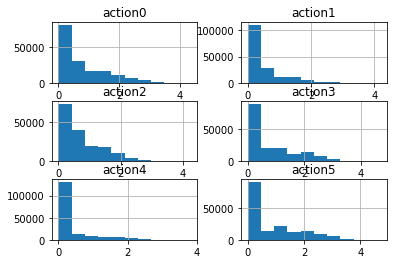

In [14]:
fg = data[["action0","action1","action2","action3","action4","action5"]]+1
np.log(fg).hist()

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
data[["action0","action1","action2","action3","action4","action5"]] = StandardScaler().fit_transform(data[["action0","action1","action2","action3","action4","action5"]])
data.head()

,tot_sess_hr_v,action0,action1,action2,action3,action4,action5,holiday,Sun24,week__0,...,trfc__PORTAL_2,trfc__PORTAL_3,trfc__PUSH,trfc__WEBSITE,trfc__unknown,dvc__PC,dvc__mobile_app,dvc__mobile_web,dvc__unknown,gender_age
0,6.770789,1.275987,2.235942,1.453328,-0.091514,-0.380494,2.992861,0,1,0,...,0,0,0,0,0,0,0,0,1,F_30
1,3.663562,-0.528008,-0.426198,-0.581574,-0.532577,-0.380494,-0.349479,0,0,1,...,0,0,0,0,0,0,0,0,1,F_30
2,4.897840,-0.528008,-0.426198,0.775027,-0.532577,-0.380494,-0.173567,0,0,1,...,0,0,0,0,0,0,0,0,1,F_30
3,6.848005,-0.528008,-0.426198,-0.581574,-0.312045,-0.380494,0.178259,0,0,1,...,0,0,0,0,0,0,0,0,1,F_30
4,7.497207,-0.528008,0.017492,-0.581574,-0.532577,-0.380494,-0.525392,0,0,1,...,0,0,0,0,0,0,0,0,1,F_30


In [198]:
a, ord = data["gender_age"].factorize()
data["gender_age"] = a

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
feature_columns = list(data.columns.difference(['gender_age'])) 
X = data[feature_columns] 
y = data["gender_age"] 

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [201]:
import lightgbm as lgb
from sklearn.metrics import confusion_matrix
import time
start = time.time() # 시작 시간 지정
lgb_dtrain = lgb.Dataset(data = train_x, label = train_y) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 30, # 트리 깊이
            'learning_rate': 0.1, # Step Size
            'n_estimators': 200, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(train_y)) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = np.argmax(lgb_model.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
print("Accuracy: %.2f" % (accuracy_score(test_y, lgb_model_predict) * 100), "%") # 정확도 % 계산
print("Time: %.2f" % (time.time() - start), "seconds") # 코드 실행 시간 계산
confusion_matrix(test_y, lgb_model_predict)

Accuracy: 38.65 %
Time: 2.73 seconds


array([[444, 436,   2,  11,  24,   0,   1,   1],
       [349, 654,   2,   5,  64,   3,   0,   0],
       [ 54,  64,   0,   4,   6,   0,   0,   1],
       [114,  63,   0,   4,   3,   1,   0,   0],
       [ 78, 258,   2,   3,  46,   2,   0,   5],
       [ 19,  39,   0,   0,  14,   1,   0,   0],
       [ 13,  10,   0,   1,   2,   1,   0,   0],
       [ 56, 102,   1,   0,   8,   2,   0,   0]], dtype=int64)

In [39]:
train_y.value_counts()

1    55350
0    34529
3    25194
6     7721
7     3950
4     3927
2     3855
5      622
Name: gender_age, dtype: int64

In [40]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42, ratio = 0.5) # SMOTE 알고리즘, 비율 증가(30%증가)
X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel()) # Over Sampling 진행

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-40-c8f5b3a76c5e>", line 4, in <module>
    X_train_res, y_train_res = sm.fit_sample(train_x, train_y.ravel()) # Over Sampling 진행
  File "C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\imblearn\base.py", line 82, in fit_resample
    self.sampling_strategy, y, self._sampling_type)
  File "C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\imblearn\utils\_validation.py", line 464, in check_sampling_strategy
    _sampling_strategy_float(sampling_strategy, y, sampling_type)
  File "C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\imblearn\utils\_validation.py", line 309, in _sampling_strategy_float
    '"sampling_strategy" can be a float only when the type '
ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class,

ValueError: "sampling_strategy" can be a float only when the type of target is binary. For multi-class, use a dict.

In [177]:
from imblearn.under_sampling import *
X_samp, y_samp = CondensedNearestNeighbour(random_state=0).fit_sample(train_x, train_y)
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_samp), label = pd.DataFrame(y_samp)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_samp))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2) # 학습 진행
lgb_model2_predict = np.argmax(lgb_model2.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(test_y, lgb_model2_predict) # 모델 분류 평가 결과

KeyboardInterrupt: 

In [62]:
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    print("Model_Evaluation with Label:1")
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("F1-Score: ", F1_Score)
lgb_dtrain2 = lgb.Dataset(data = pd.DataFrame(X_train_res), label = pd.DataFrame(y_train_res)) # 학습 데이터를 LightGBM 모델에 맞게 변환
lgb_param2 = {'max_depth': 10, # 트리 깊이
            'learning_rate': 0.01, # Step Size
            'n_estimators': 50, # Number of trees, 트리 생성 개수
            'objective': 'multiclass', # 목적 함수
            'num_class': len(set(pd.DataFrame(y_train_res))) + 1} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
lgb_model2 = lgb.train(params = lgb_param2, train_set = lgb_dtrain2) # 학습 진행
lgb_model2_predict = np.argmax(lgb_model2.predict(test_x), axis = 1) # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측
model_evaluation(test_y, lgb_model2_predict) # 모델 분류 평가 결과

C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


Model_Evaluation with Label:1
Accuracy:  0.7044808807860778
Precision:  0.16049240681086055
Recall:  0.34166054371785454
F1-Score:  0.21839530332681018


In [66]:
from sklearn.metrics import classification_report
print(classification_report(test_y, lgb_model2_predict))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     29705
           1       0.00      0.00      0.00      4083

    accuracy                           0.88     33788
   macro avg       0.44      0.50      0.47     33788
weighted avg       0.77      0.88      0.82     33788



C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [173]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn import metrics
rfm = RandomForestClassifier(n_estimators = 50, # 50번 추정
                                             max_depth = 15, # 트리 최대 깊이 10
                                             random_state = 42)
scores = cross_val_score(rfm,X,y,cv=5,scoring="accuracy")
print(scores)
print(scores.std())

[0.37802419 0.38580558 0.38244198 0.3845895  0.37731404]
0.0034200210139069156


In [31]:
import random
from math import sqrt
from sklearn.metrics import mean_squared_error, r2_score
bagging_predict_result = [] # 빈 리스트 생성
for _ in range(30):
    data_index = [data_index for data_index in range(train_x.shape[0])] # 학습 데이터의 인덱스를 리스트로 변환
    random_data_index = np.random.choice(data_index, train_x.shape[0]) # 데이터의 1/10 크기만큼 랜덤 샘플링, // 는 소수점을 무시하기 위함
    print(len(set(random_data_index)))
    lgb_dtrain = lgb.Dataset(data = train_x.iloc[random_data_index,], label = train_y.iloc[random_data_index]) # 학습 데이터를 LightGBM 모델에 맞게 변환
    lgb_param = {'max_depth': 10, # 트리 깊이
                'learning_rate': 0.01, # Step Size
                'n_estimators': 500, # Number of trees, 트리 생성 개수
                'objective': 'regression'} # 파라미터 추가, Label must be in [0, num_class) -> num_class보다 1 커야한다.
    lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
 
    predict1 = lgb_model.predict(test_x) # 테스트 데이터 예측
    bagging_predict_result.append(predict1) # 반복문이 실행되기 전 빈 리스트에 결과 값 저장
    print(sqrt(mean_squared_error(lgb_model.predict(test_x),test_y)))
    

85317
1.8051887041207753
85530


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806314819118154
85524


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806802060164214
85635


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806449581346922
85522


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806092713557327
85465


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806432016148659
85429


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8068933144804233
85476


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806303544221887
85395


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8061706158116904
85425


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8060161090851143
85292


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8066299393877279
85515


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8059268351337234
85282


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806171319447643
85421


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8061270237803921
85354


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8057330789783146
85169


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8057967406999798
85421


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8060149672883992
85463


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.805845729212008
85514


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8059943325484595
85425


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.805326983974968
85491


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8061736661599646
85447


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8062613757701689
85537


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8048647264837903
85449


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8069796257448154
85538


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.804903716758423
85340


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8071273313035718
85449


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8053793679316799
85492


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.806623619633885
85406


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8073795892341922
85420


C:\Users\Gyu\Anaconda3\envs\py37\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


1.8057467165770351


In [32]:
bagging_predict = [] # 빈 리스트 생성
for lst2_index in range(test_x.shape[0]): # 테스트 데이터 개수만큼의 반복
    temp_predict = [] # 임시 빈 리스트 생성 (반복문 내 결과값 저장)
    for lst_index in range(len(bagging_predict_result)): # Bagging 결과 리스트 반복
        temp_predict.append(bagging_predict_result[lst_index][lst2_index]) # 각 Bagging 결과 예측한 값 중 같은 인덱스를 리스트에 저장
    bagging_predict.append(np.mean(temp_predict))

In [33]:
sqrt(mean_squared_error(bagging_predict,test_y))

1.8044651164259242

In [ ]:
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

y_pred = rbf_kernel_svm.predict(test_x)
accuracy_score(test_y, y_pred)

In [24]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(X)
plt.figure(figsize=(13,10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap="jet")
plt.axis('off')
plt.colorbar()

KeyboardInterrupt: 

In [186]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA


pca = PCA(n_components=1, random_state=42)
pcs = pca.fit_transform(train_x)

clf2 = LogisticRegression(solver="sag", multi_class="multinomial").fit(pcs,train_y) 
confusion_matrix(train_y,clf2.predict(pcs))

array([[2472,    0,    0,    0, 1034,    0,    0,    0],
       [2896,    0,    0,    0, 1323,    0,    0,    0],
       [ 427,    0,    0,    0,  145,    0,    0,    0],
       [ 516,    0,    0,    0,  179,    0,    0,    0],
       [1082,    0,    0,    0,  578,    0,    0,    0],
       [ 212,    0,    0,    0,  138,    0,    0,    0],
       [ 115,    0,    0,    0,   48,    0,    0,    0],
       [ 502,    0,    0,    0,  225,    0,    0,    0]], dtype=int64)

In [187]:
pcs

array([[-185788.83563741],
       [-477516.33076256],
       [-122919.36883871],
       ...,
       [2116554.00895496],
       [-385789.11966514],
       [1903009.36962705]])

In [188]:
train_x

,Sun24,action_0,action_1,action_2,action_3,action_4,action_5,action_6,biz_A01,biz_A02,...,trfc_PUSH,trfc_WEBSITE,trfc_unknown,week_0,week_1,week_2,week_3,week_4,week_5,week_6
4630,0.000000,0,0,1,2,0,9,1,0,0,...,0,0,0,2,2,4,4,1,0,0
4923,0.000000,1,0,0,0,0,0,1,1,0,...,0,1,0,1,0,0,1,0,0,0
322,0.000000,6,0,3,5,0,6,7,0,0,...,0,0,0,9,3,6,0,4,4,1
5872,0.000000,2,0,0,0,0,0,2,1,0,...,0,0,0,3,1,0,0,0,0,0
8876,0.000000,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8696,0.000000,12,0,0,0,0,0,1,1,0,...,0,0,0,2,3,3,3,2,0,0
7711,0.000000,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2754,0.000000,0,0,0,1,0,6,4,0,0,...,1,0,0,3,0,2,0,3,3,0
7197,0.111111,4,0,0,0,0,0,5,1,0,...,0,0,0,0,2,1,1,0,4,1
8371,0.000000,0,0,0,0,0,1,1,0,0,...,0,1,0,0,0,0,0,2,0,0
